# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | beitbridge
Processing Record 3 of Set 1 | gaspe
Processing Record 4 of Set 1 | toga village
City not found. Skipping...
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | altamira
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | chos malal
Processing Record 9 of Set 1 | namibe
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | bathsheba
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | choibalsan
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | saldanha
Processing Record 18 of Set 1 | nizhnevartovsk
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | tsiombe
Processing Record 21 of Set 1 | wailua homesteads
Processing Record 22 of

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,22.77,76,0,7.20,US,1691541930
1,beitbridge,-22.2167,30.0000,14.15,49,0,2.66,ZW,1691542270
2,gaspe,48.8334,-64.4819,17.12,100,100,4.63,CA,1691542270
3,puerto natales,-51.7236,-72.4875,1.54,98,99,1.68,CL,1691542168
4,altamira,-3.2033,-52.2064,26.30,68,27,1.36,BR,1691542270


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,22.77,76,0,7.20,US,1691541930
1,beitbridge,-22.2167,30.0000,14.15,49,0,2.66,ZW,1691542270
2,gaspe,48.8334,-64.4819,17.12,100,100,4.63,CA,1691542270
3,puerto natales,-51.7236,-72.4875,1.54,98,99,1.68,CL,1691542168
4,altamira,-3.2033,-52.2064,26.30,68,27,1.36,BR,1691542270


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

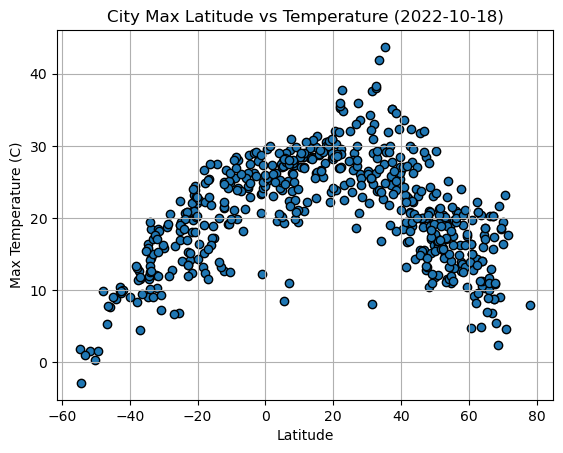

In [19]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Temperature (2022-10-18)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

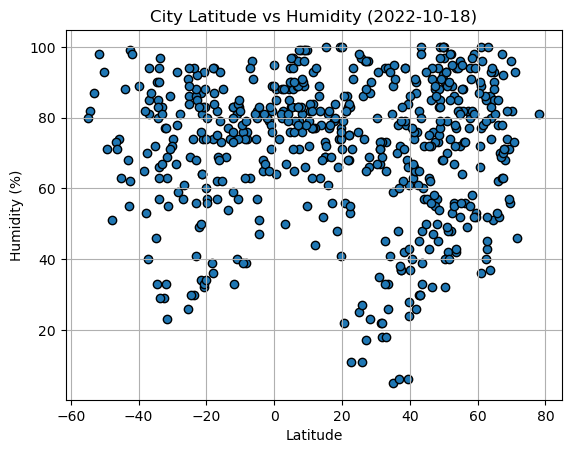

In [20]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

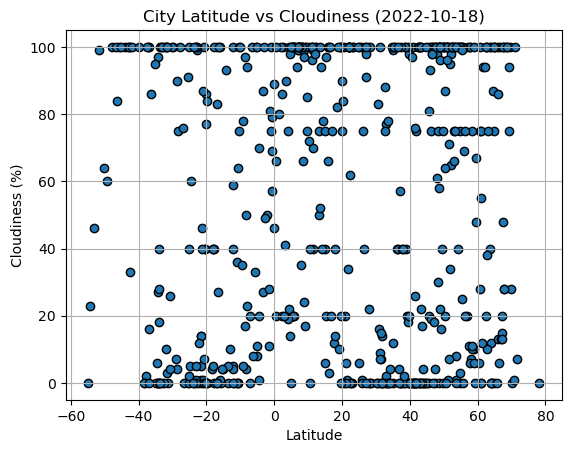

In [21]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

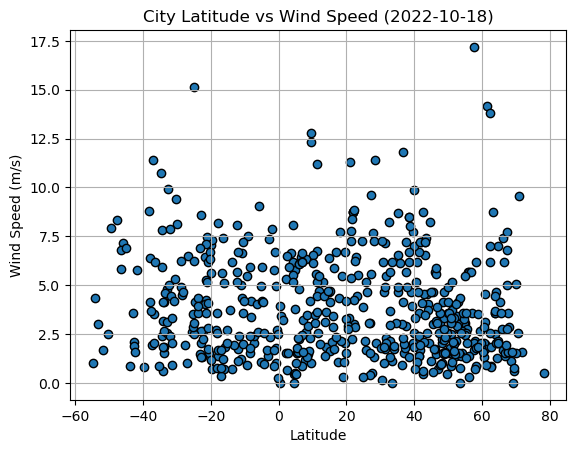

In [22]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots


In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,22.77,76,0,7.20,US,1691541930
2,gaspe,48.8334,-64.4819,17.12,100,100,4.63,CA,1691542270
9,bathsheba,13.2167,-59.5167,28.34,89,75,5.14,BB,1691542270
10,iqaluit,63.7506,-68.5145,4.85,86,40,3.60,CA,1691541967
12,choibalsan,48.0667,114.5000,19.95,57,98,1.00,MN,1691542270


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,beitbridge,-22.2167,30.0000,14.15,49,0,2.66,ZW,1691542270
3,puerto natales,-51.7236,-72.4875,1.54,98,99,1.68,CL,1691542168
4,altamira,-3.2033,-52.2064,26.30,68,27,1.36,BR,1691542270
5,bredasdorp,-34.5322,20.0403,9.06,90,0,2.38,ZA,1691542171
6,chos malal,-37.3781,-70.2709,12.67,40,100,1.96,AR,1691542270


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.40324060572294296


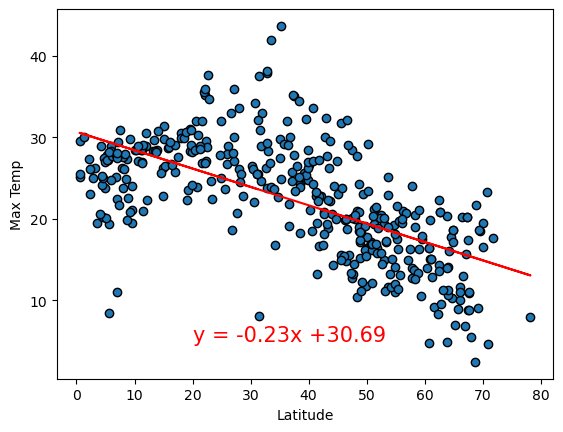

In [27]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolors="black")
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.6684354753925282


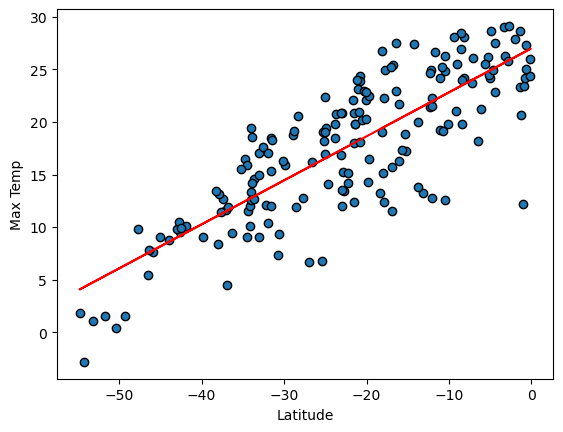

In [28]:
# Linear regression on Southern Hemisphere


x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_south)

regress_values_south = x_values_south * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],edgecolors="black")
plt.plot(southern_hemi_df["Lat"],regress_values_south,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** As latitude increases in the Northern Hemisphere, the Max Temperature decreases.  The contraria is shown for the Southern Hemisphere, as latitud increases the Max Temperature increases as well.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.007607118536960186


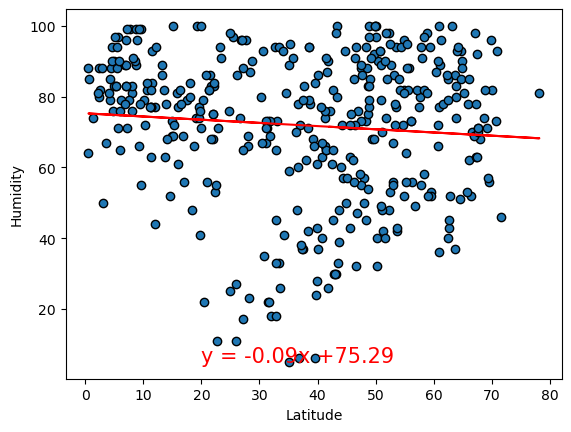

In [30]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],edgecolors="black")
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 1.2933417829119138e-05


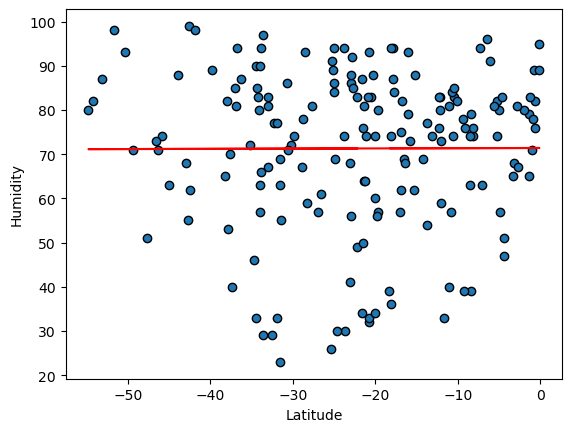

In [31]:
# Southern Hemisphere

x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_south)

regress_values_south = x_values_south * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],edgecolors="black")
plt.plot(southern_hemi_df["Lat"],regress_values_south,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** It seems that in the northern hemisphere as latitude increase the humidity increases but very slightly and in the southern hemisphere as latitude increases humidity decreases slightly but more noticeable.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.010865155818274196


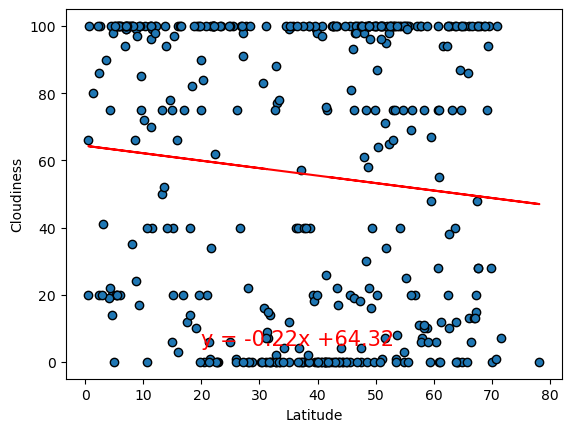

In [32]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],edgecolors="black")
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.010579386585566149


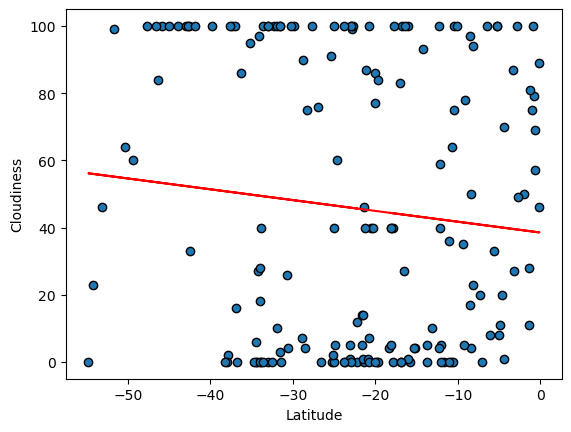

In [33]:
# Southern Hemisphere

x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_south)

regress_values_south = x_values_south * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],edgecolors="black")
plt.plot(southern_hemi_df["Lat"],regress_values_south,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** For both the north and southern hemispheres cloudiness decreases as latitude increases but this can vary depending on the cities that are studied.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.015390336448104404


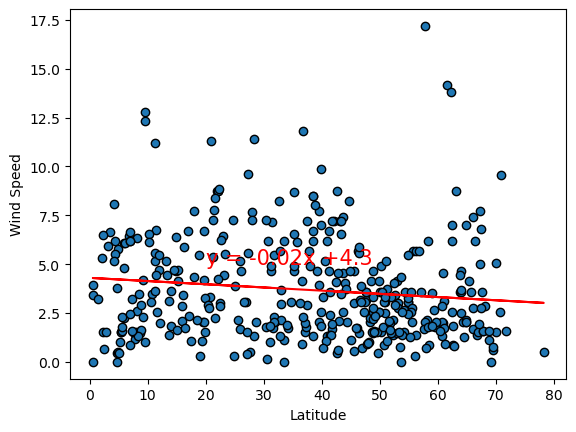

In [34]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],edgecolors="black")
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


The r-value is: 0.014431341143258919


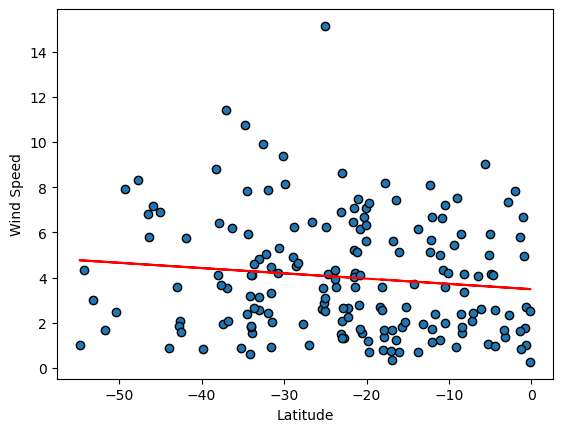

In [35]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_southern, y_values_southern)

regress_values = x_values_southern * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],edgecolors="black")
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Generally speaking as the latitude increases in the northern hemisphere the wind speed decreases but there are many outliers as well that present very high speeds.  As for the southern hemisphere the linear regression is pretty stable and is almost neutral as latitud increases.